# Exercícios - Aula 3

1. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.


3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.


4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.


5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos 
imóveis, a partir do ano de 1930.


6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos 
imóveis.


7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )


8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )


9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )


10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 

In [26]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
from matplotlib import gridspec

df = pd.read_csv('csv/kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [15]:
# 1. Crie uma nova coluna chamada: “dormitory_type”
#     - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
#     - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
#     - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

df['dormitory_type'] = df['bedrooms'].apply(lambda x: 'studio' if (x == 1) else 'apartament' if (x == 2) else 'house' if (x == 3) else 'NA' )
df['dormitory_type'] 

0             house
1             house
2        apartament
3                NA
4             house
            ...    
21608         house
21609            NA
21610    apartament
21611         house
21612    apartament
Name: dormitory_type, Length: 21613, dtype: object

<BarContainer object of 13 artists>

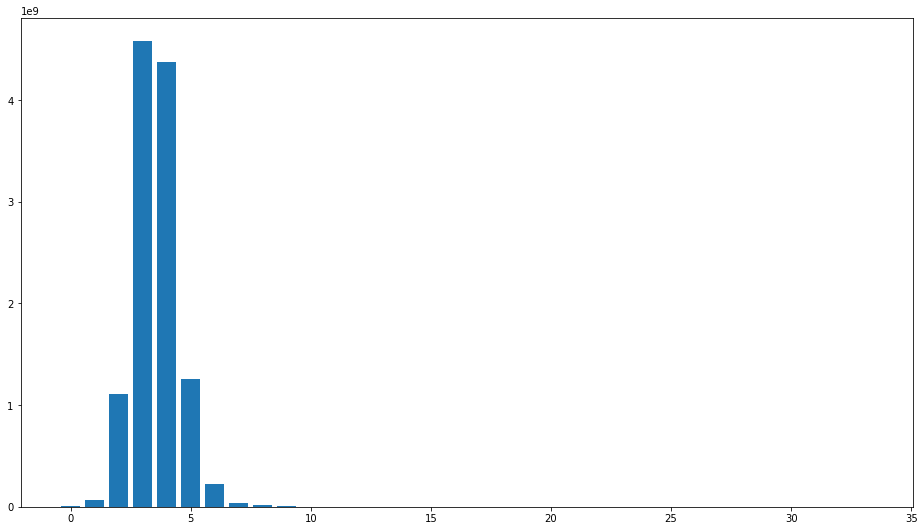

In [9]:
# 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.
sum_num_bedroom = df[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize=(16, 9))
plt.bar(sum_num_bedroom.bedrooms, sum_num_bedroom.price)


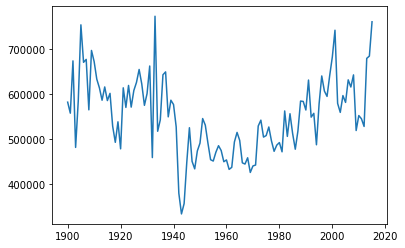

In [12]:
# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.
mean_price_yr_buit = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.plot(mean_price_yr_buit.yr_built, mean_price_yr_buit.price)

<BarContainer object of 4 artists>

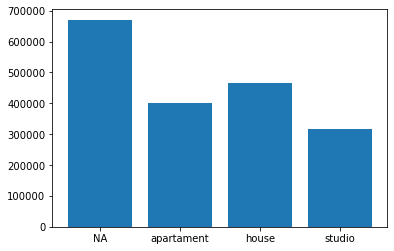

In [17]:
# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.
mean_price_dorm_type = df[['dormitory_type', 'price']].groupby('dormitory_type').mean().reset_index()
plt.bar(mean_price_dorm_type.dormitory_type, mean_price_dorm_type.price)

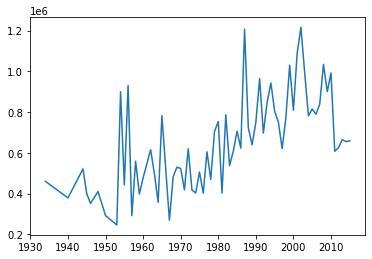

In [23]:
# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos 
# imóveis, a partir do ano de 1930.
above_1930 = df[df['yr_renovated'] > 1930]
above_1930_mean_price = above_1930[['yr_renovated', 'price']].groupby('yr_renovated').mean().reset_index()
plt.plot(above_1930_mean_price.yr_renovated, above_1930_mean_price.price)

In [25]:
# 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

df[['price', 'yr_built', 'dormitory_type']].groupby(['dormitory_type', 'yr_built']).mean().reset_index()

dormitory_type  yr_built          price
0               NA      1900  657070.967742
1               NA      1901  619017.857143
2               NA      1902  822076.923077
3               NA      1903  594495.000000
4               NA      1904  816500.444444
..             ...       ...            ...
416         studio      2008  337250.000000
417         studio      2009  382500.000000
418         studio      2011  310000.000000
419         studio      2014  516500.000000
420         studio      2015  385195.000000

[421 rows x 3 columns]

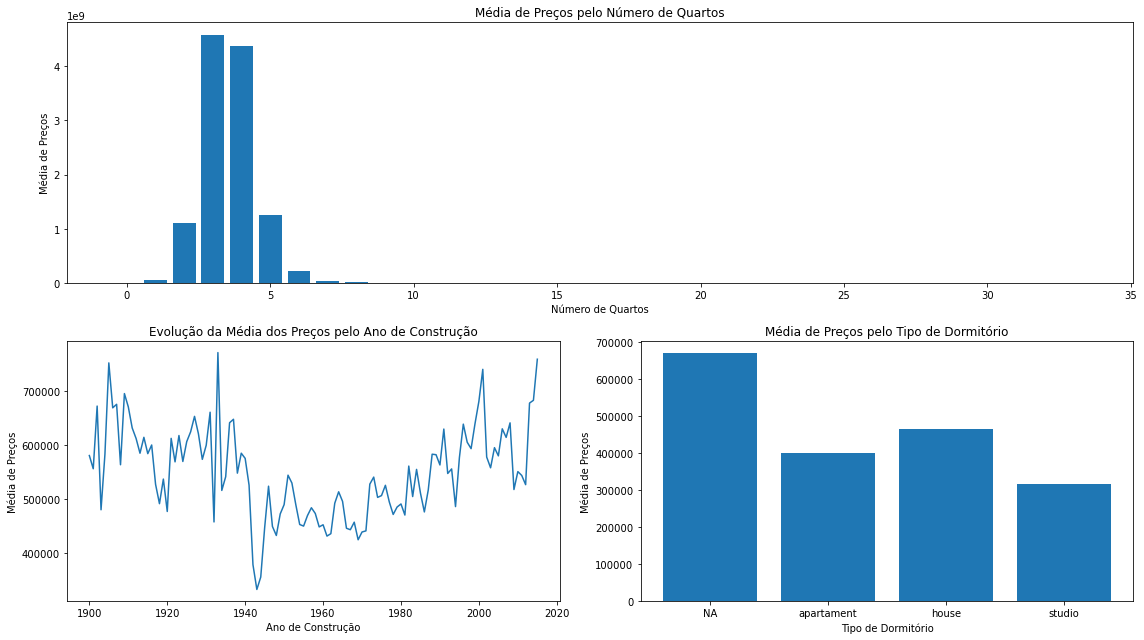

In [32]:
# 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )

fig = plt.figure(figsize=[16, 9])
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) 
ax2 = fig.add_subplot(specs[1, 0]) 
ax3 = fig.add_subplot(specs[1, 1])

#primeiro gráfico
ax1.bar(sum_num_bedroom.bedrooms, sum_num_bedroom.price)
ax1.set_xlabel('Número de Quartos')
ax1.set_ylabel('Média de Preços')
ax1.set_title('Média de Preços pelo Número de Quartos')

#segundo gráfico
ax2.plot(mean_price_yr_buit.yr_built, mean_price_yr_buit.price)
ax2.set_xlabel('Ano de Construção')
ax2.set_ylabel('Média de Preços')
ax2.set_title('Evolução da Média dos Preços pelo Ano de Construção')

ax3.bar(mean_price_dorm_type.dormitory_type, mean_price_dorm_type.price)
ax3.set_xlabel('Tipo de Dormitório')
ax3.set_ylabel('Média de Preços')
ax3.set_title('Média de Preços pelo Tipo de Dormitório')
plt.tight_layout()


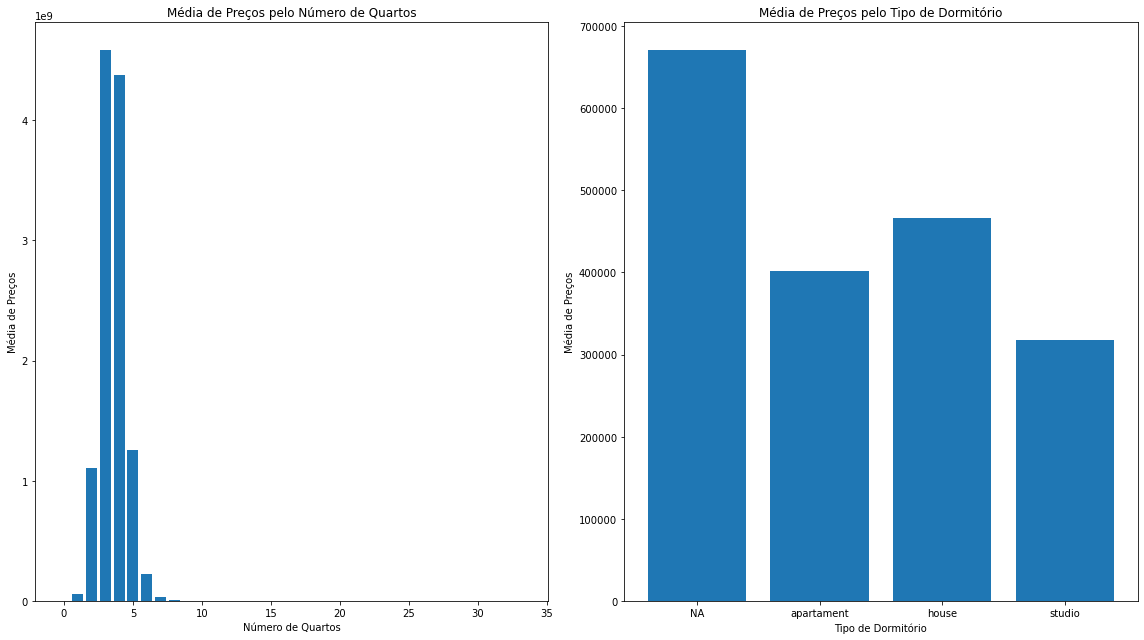

In [35]:
# 8. Crie um Dashboard com os gráficos das perguntas 02, 04 (Dashboard: 2 colunas)
fig = plt.figure(figsize=[16, 9])
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) 
ax2 = fig.add_subplot(specs[0, 1]) 

#primeiro gráfico
ax1.bar(sum_num_bedroom.bedrooms, sum_num_bedroom.price)
ax1.set_xlabel('Número de Quartos')
ax1.set_ylabel('Média de Preços')
ax1.set_title('Média de Preços pelo Número de Quartos')

#segundo gráfico
ax2.bar(mean_price_dorm_type.dormitory_type, mean_price_dorm_type.price)
ax2.set_xlabel('Tipo de Dormitório')
ax2.set_ylabel('Média de Preços')
ax2.set_title('Média de Preços pelo Tipo de Dormitório')
plt.tight_layout()

Text(0.5, 1.0, 'Média de Preços pelo Ano de Reforma')

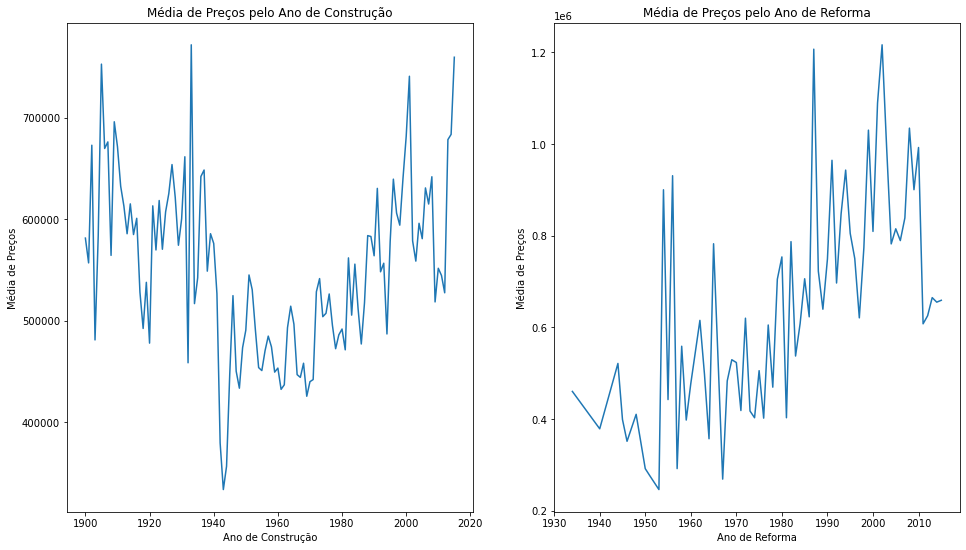

In [41]:
#  9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )
fig = plt.figure(figsize=[16, 9])
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) 
ax2 = fig.add_subplot(specs[0, 1]) 

#primeiro gráfico
ax1.plot(mean_price_yr_buit.yr_built, mean_price_yr_buit.price)
ax1.set_xlabel('Ano de Construção')
ax1.set_ylabel('Média de Preços')
ax1.set_title('Média de Preços pelo Ano de Construção')

#segundo gráfico
ax2.plot(above_1930_mean_price.yr_renovated, above_1930_mean_price.price)
ax2.set_xlabel('Ano de Reforma')
ax2.set_ylabel('Média de Preços')
ax2.set_title('Média de Preços pelo Ano de Reforma')

In [43]:
# 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 
import plotly.express as px

houses = df[['id', 'lat', 'long', 'sqft_living']]

fig = px.scatter_mapbox(houses, 
                        lat='lat', 
                        lon='long', 
                        size='sqft_living',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()